In [36]:
#Load dữ liệu từ drive vào các biến X_train, y_train
from os import listdir
from numpy import asarray,save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
folder = '/content/drive/MyDrive/AI/10MonAn/'
photos, labels = list(),list()
for file in listdir(folder):
  output = 0.
  if file.startswith('BanhCuon'):
    output = 1.0
  if file.startswith('BanhXeo'):
    output = 2.0
  if file.startswith('BoLaLot'):
    output = 3.0
  if file.startswith('BunBo'):
    output = 4.0
  if file.startswith('ComTam'):
    output = 5.0
  if file.startswith('Ga'):
    output = 6.0
  if file.startswith('MiXao'):
    output = 7.0
  if file.startswith('MucRiem'):
    output = 8.0
  if file.startswith('ThiKhoTau'):
    output = 9.0
  photo = load_img(folder+file,target_size=(100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels= asarray(labels)
print(photos.shape,labels.shape)
save('X_train.npy',photos)
save('y_train.npy',labels)

(550, 100, 100, 3) (550,)


In [37]:
folder = '/content/drive/MyDrive/AI/10MonAnTest/'
photos1, labels1 = list(),list()
for file in listdir(folder):
  output = 0.
  if file.startswith('BanhCuon'):
    output = 1.0
  if file.startswith('BanhXeo'):
    output = 2.0
  if file.startswith('BoLaLot'):
    output = 3.0
  if file.startswith('BunBo'):
    output = 4.0
  if file.startswith('ComTam'):
    output = 5.0
  if file.startswith('Ga'):
    output = 6.0
  if file.startswith('MiXao'):
    output = 7.0
  if file.startswith('MucRiem'):
    output = 8.0
  if file.startswith('ThiKhoTau'):
    output = 9.0
  photo = load_img(folder+file,target_size=(100,100))
  photo = img_to_array(photo)
  photos1.append(photo)
  labels1.append(output)
photos1 = asarray(photos1)
labels1= asarray(labels1)
print(photos1.shape,labels1.shape)
save('X_train.npy',photos1)
save('y_train.npy',labels1)

(150, 100, 100, 3) (150,)


In [25]:
X_train = np.zeros(600,32,32,3)

NameError: ignored

In [38]:
#Chuyển kiểu dữ liệu
photos = photos.astype('float32')
photos1 = photos1.astype('float32')
photos/=255
photos1/=255
from keras.utils import np_utils
labels=np_utils.to_categorical(labels,10)
labels1=np_utils.to_categorical(labels1,10)

In [22]:
photos1.shape


(550, 100, 100, 3)

In [34]:
#Khởi tạo model và training
from keras.models import Sequential
from keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.callbacks import EarlyStopping 
from keras.layers import Dense, Activation, BatchNormalization, Dropout, LSTM
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(photos,labels,epochs=100, batch_size=32, validation_data=(photos1,labels1),verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


18/18 [==============================] - 1s 33ms/step - loss: 5.9897 - accuracy: 0.1400 - val_loss: 2.1836 - val_accuracy: 0.1667
Epoch 2/100
18/18 [==============================] - 0s 24ms/step - loss: 2.0439 - accuracy: 0.2109 - val_loss: 2.0223 - val_accuracy: 0.2067
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 1.7294 - accuracy: 0.3800 - val_loss: 1.6477 - val_accuracy: 0.4067
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 1.3087 - accuracy: 0.5382 - val_loss: 1.7346 - val_accuracy: 0.3867
Epoch 5/100
18/18 [==============================] - 0s 23ms/step - loss: 0.9870 - accuracy: 0.6491 - val_loss: 1.8669 - val_accuracy: 0.3733
Epoch 6/100
18/18 [==============================] - 0s 24ms/step - loss: 0.5939 - accuracy: 0.8036 - val_loss: 1.3200 - val_accuracy: 0.5733
Epoch 7/100
18/18 [==============================] - 0s 23ms/step - loss: 0.3825 - accuracy: 0.8982 - val_loss: 1.4107 - val_accuracy: 0.5267
Epoch 8/100
18/18 

In [39]:

from keras.applications.vgg16 import VGG16
from keras.models import Model
model = VGG16(include_top=False,input_shape=(100,100,3))
for layers in model.layers:
  layers.trainable = False
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128,activation='relu',kernel_initializer='he_uniform')(flat1)
output = Dense(10,activation='softmax')(class1)
model = Model(inputs=model.inputs,outputs=output)
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(photos,labels,epochs=100, batch_size=32, validation_data=(photos1,labels1),verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


18/18 [==============================] - 3s 144ms/step - loss: 2.3042 - accuracy: 0.1891 - val_loss: 1.7151 - val_accuracy: 0.4267
Epoch 2/100
18/18 [==============================] - 2s 128ms/step - loss: 1.6686 - accuracy: 0.4018 - val_loss: 1.5733 - val_accuracy: 0.3667
Epoch 3/100
18/18 [==============================] - 2s 128ms/step - loss: 1.4134 - accuracy: 0.5018 - val_loss: 1.5227 - val_accuracy: 0.4800
Epoch 4/100
18/18 [==============================] - 2s 127ms/step - loss: 1.1403 - accuracy: 0.5909 - val_loss: 1.5277 - val_accuracy: 0.4800
Epoch 5/100
18/18 [==============================] - 2s 128ms/step - loss: 1.0349 - accuracy: 0.6364 - val_loss: 1.3786 - val_accuracy: 0.5267
Epoch 6/100
18/18 [==============================] - 2s 128ms/step - loss: 0.9780 - accuracy: 0.6345 - val_loss: 1.2886 - val_accuracy: 0.5933
Epoch 7/100
18/18 [==============================] - 2s 127ms/step - loss: 0.9190 - accuracy: 0.6673 - val_loss: 1.1025 - val_accuracy: 0.6000
Epoch 8/100

In [40]:
# Độ chính xác
score = model.evaluate (photos1,labels1,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 1.1023422479629517
Test accuracy: 0.7200000286102295


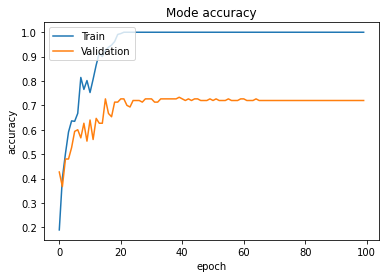

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Mode accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

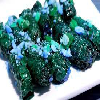

Bò Lá Lốt


In [48]:
#Kiểm tra nhận dạng
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
folder = '/content/drive/MyDrive/AI/Test10MonAn_1/'
filename = folder+'BoLaLot.01.jpg'
img = load_img(filename, target_size=(100,100))
img = img_to_array(img)
cv2_imshow(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img/=255
u= np.argmax(model.predict(img))
nhandang = ['Phở gà','Bánh cuốn','Bánh xèo','Bò Lá Lốt','Bún bò','Cơm Tấm','Gà','Mì xào','Mực Riêm','Thịt Kho Tàu']
print(nhandang[u])

In [ ]:
#Kiểm tra nhận dạng
import cv2
import numpy as np
tuan = cv2.imread('Tuan.jpg')
tuan = cv2.resize(tuan,(150,150))
thinh = cv2.imread('Thinh.jpg')
thinh = cv2.resize(thinh,(150,150))
hung = cv2.imread('Hung.jpg')
hung = cv2.resize(hung,(150,150))
L = [tuan,thinh,hung]
NhanDang =  ['Tuấn','Thịnh','Hưng']
img = asarray(L)
img.shape
img = img.reshape(3,67500)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
for i in range (3):
  plt.figure(figsize=(1.5,1.5))
  plt.imshow(img[i].reshape(150,150,3))
  plt.show()
  print('Kết quả nhận dạng: ',NhanDang[np.argmax(y_pred[i])])